In [13]:
import numpy as np
from sklearn import datasets

# 사이킷런에 데이터셋에서 붓꽃 데이터셋 가져오기
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래쓰 레이블', np.unique(y))


클래쓰 레이블 [0 1 2]


In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그리는 부분
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 각 클래스 별로 데이터 점 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')

    # 테스트 인덱스가 있을 경우, 테스트 데이터셋 특별 표시
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    edgecolor='black', alpha=1.0, linewidth=1,
                    marker='o', s=100, label='test set')

In [15]:
from sklearn.model_selection import train_test_split
# 데이터셋 분할 기능 모듈이다.
# test : train = 3 : 7 비율로 데이터를 랜덤하게 나눈다. 
# random_state=1, 랜덤 시드생성기에 시드넘버로 1을 넣는다.
# stratify=y 계층화 기능을 쓴다. 클래쓰 레이블 비율을 입력 데이터셋과 동일하게 만든다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
from sklearn.preprocessing import StandardScaler
# 머신러닝 알고리즘의 최적화를 위해서 특성스케일 조정 -> 표준화
# 표준화라면? 1. 데이터의 평균을 0으로 만든다. 2. 데이터의 표준편차를 0~1값으로 만든다.

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
from sklearn.linear_model import Perceptron
# 사이킷런 내장 퍼셉트론 사용법
# 1. 퍼셉트론 객체를 선언한다. (학습률, 랜덤 시드 번호)
# 2. fit 함수를 이용해서 이를 학습시킨다.
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
# 45개의 샘플중에서 이 예측모델은 1개의 샘플을 잘못분류 했따. 이 오차는 대략 0.022 (2.2%)이다.
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' %(y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [19]:
from sklearn.metrics import accuracy_score
# metrics 모듈아래 다양한 성능 지표 계산 구현중, 분류 정확도 계산법
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))

정확도 : 0.978


In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 

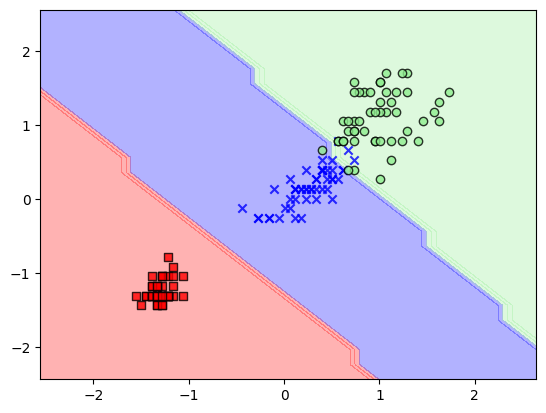

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_combined_std, y_combined)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr,
    test_idx=range(105,150)
)
plt.show()

In [23]:
lr.predict_proba(X_test_std[:3,:]) 
# 각각의 행은 그 데이터가 3개의 클래쓰중 어디에 분류될지의 확률이다.
# 예를들어. 첫번째 행 [1.45969214e-13, 1.28601392e-04, 9.99871399e-01] 은 1.45*10^-13%, 1.28*10^4, 99% 확률로 각각의 클래쓰에 속할확률이다. 합계는 당연히 1이다.
# 0, 1, 2 클래쓰중 클래쓰 2에 속할 확률이 99퍼임으로 argmax(axis=1)의 결과는 2이다.

array([[1.45969214e-13, 1.28601392e-04, 9.99871399e-01],
       [9.95418429e-01, 4.58157135e-03, 2.84747846e-15],
       [9.99174077e-01, 8.25922797e-04, 4.28930786e-17]])

In [24]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1) 

array([2, 0, 0])

In [25]:
# 사이킷런 주의점. 사이킷런은 입력데이터로 2차원 배열을 기대함으로, 하나의 행을 2차원으로 변환시켜야한다.
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 

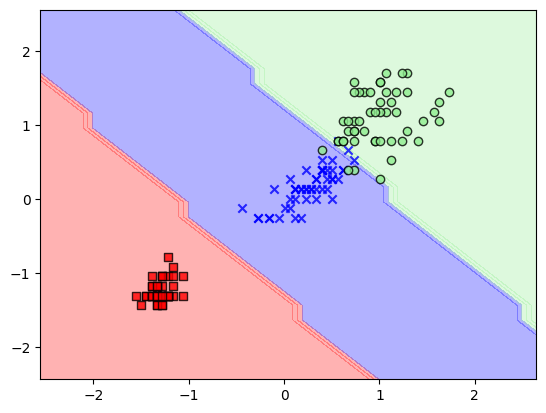

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.show()

In [28]:
# 기본 매개변수를 사용한 퍼셉트론, 로지스틱회귀, 서포트벡터 머신 확률적 경사하강법 코드 정리
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [31]:
# 비선형적인 데이터를 위한 커널 SVM

# 간단한 XOR형태의 데이터셋 생성